# This notebook has been tested with 
* Python 3.5
* OpenCV 3.1.0

# Use Open CV haarcascade classifier to detect face
There are 4 different classifiers in the library file:C:\Anaconda3\envs\tensorflow\Library\etc\haarcascades

* haarcascade_frontalface_alt.xml
* haarcascade_frontalface_alt_tree.xml
* haarcascade_frontalface_alt2.xml
* haarcascade_frontalface_default.xml

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math
import cv2

# CascadeClassifier::detectMultiScale
A reference of detectMultiScale parameter <br />
http://docs.opencv.org/2.4/modules/objdetect/doc/cascade_classification.html#cascadeclassifier-detectmultiscale

In [2]:
def faceDetect(imagePath, cascadeClassifier="haarcascade_frontalface_alt.xml", scaleFactor = 1.05,
               minNeighbors=3, minSize = (60,60)):
    faceCascade = cv2.CascadeClassifier(cascadeClassifier)

    # Read image
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
    # Detect faces
    faces = faceCascade.detectMultiScale(image=gray, scaleFactor=scaleFactor, minNeighbors=minNeighbors, minSize=minSize)

    print("Found {0} faces!".format(len(faces)))

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Show image
    plt.imshow(image)

# ScaleFactor is the downsampling rate of the image
* scaleFactor – Parameter specifying how much the image size is reduced at each image scale.
* scaleFactor = 1.05, means 5% size reduced at each at each image scale 

Found 1 faces!


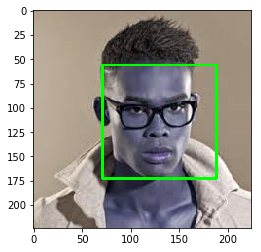

In [3]:
faceDetect('b2.jpg', "haarcascade_frontalface_alt.xml", 1.05)

Found 0 faces!


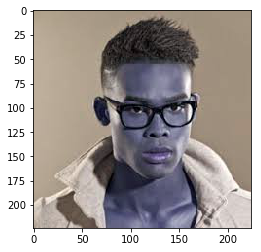

In [4]:
# Miss detection at scaleFactor = 1.1
faceDetect('b2.jpg', "haarcascade_frontalface_alt.xml", 1.1)

# minNeighbors
* minNeighbors – Parameter specifying how many neighbors each candidate rectangle should have to retain it.

Found 0 faces!


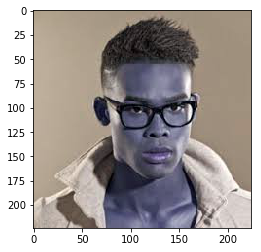

In [5]:
# Miss detection at minNeighbors = 5
faceDetect('b2.jpg', "haarcascade_frontalface_alt.xml", 1.05, 5)

Found 0 faces!


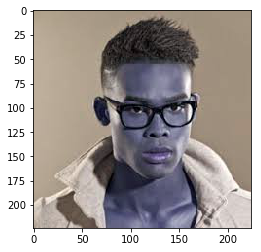

In [6]:
# Miss detection with haarcascade_frontalface_alt2.xml
faceDetect('b2.jpg', "haarcascade_frontalface_alt2.xml", 1.05)

Found 0 faces!


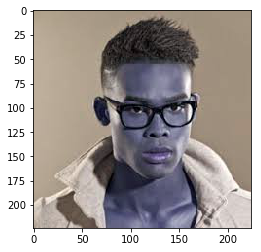

In [7]:
# Miss detection with haarcascade_frontalface_alt_tree.xml
faceDetect('b2.jpg', "haarcascade_frontalface_alt_tree.xml", 1.05)

Found 2 faces!


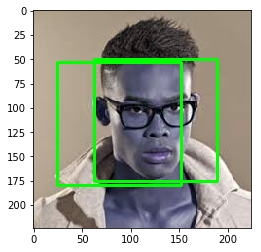

In [8]:
# Error occur with haarcascade_frontalface_default.xml
faceDetect('b2.jpg', "haarcascade_frontalface_default.xml", 1.05)